# EDA
This notebook performs a thorough exploratory data analysis (EDA) on `dataset1.csv` and `scaling.csv`. 
Objectives:

- Understand data structure, types, and basic statistics
- Check for missing values or anomalies.
- Visualize distributions of Sales, country‐level demands, and seasonal factors
- Analyze correlation structure before and after applying scaling factors
- Explore any outliers and relationships between features and target

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load raw data
df = pd.read_excel('../data/final_data.xlsx', index_col=0).reset_index(drop=True)
scaling = pd.read_excel('../data/scaling_df.xlsx', index_col=0)

# Clean scaling factors
# scaling['Scaling Factor'] = scaling['Scaling Factor'].str.replace(',', '.').astype(float)

# Display shapes and preview
print('Final Data shape:', df.shape)
print('Scaling shape:', scaling.shape)
df.head()

Final Data shape: (50000, 26)
Scaling shape: (7, 2)


,AUS_1,AUS_2,AUS_3,CAN_1,CAN_2,CAN_3,GER_1,GER_2,GER_3,FRA_1,...,JAP_2,JAP_3,USA_1,USA_2,USA_3,UK_1,UK_2,UK_3,factor,Sales
0,1,3,3,4,4,4,0,7,11,6,...,17,18,20,21,20,22,22,24,factor1,408
1,1,1,3,4,6,7,4,6,12,10,...,17,15,18,20,21,23,24,24,factor1,395
2,1,0,3,4,5,5,10,7,10,21,...,17,14,19,21,21,24,22,24,factor1,368
3,1,1,3,4,5,6,3,8,11,10,...,17,18,19,19,21,21,22,24,factor1,364
4,1,5,3,4,4,5,1,8,8,8,...,17,19,19,20,20,22,23,24,factor1,355


In [19]:
scaling

,Country,Scaling Factor
0,Australia,3.50
1,Canada,2.50
2,Germany,2.25
3,France,1.85
4,India,1.20
5,Japan,1.55
6,United States of America,1.50


## 1. Data Structures and Types

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AUS_1   50000 non-null  int64 
 1   AUS_2   50000 non-null  int64 
 2   AUS_3   50000 non-null  int64 
 3   CAN_1   50000 non-null  int64 
 4   CAN_2   50000 non-null  int64 
 5   CAN_3   50000 non-null  int64 
 6   GER_1   50000 non-null  int64 
 7   GER_2   50000 non-null  int64 
 8   GER_3   50000 non-null  int64 
 9   FRA_1   50000 non-null  int64 
 10  FRA_2   50000 non-null  int64 
 11  FRA_3   50000 non-null  int64 
 12  IND_1   50000 non-null  int64 
 13  IND_2   50000 non-null  int64 
 14  IND_3   50000 non-null  int64 
 15  JAP_1   50000 non-null  int64 
 16  JAP_2   50000 non-null  int64 
 17  JAP_3   50000 non-null  int64 
 18  USA_1   50000 non-null  int64 
 19  USA_2   50000 non-null  int64 
 20  USA_3   50000 non-null  int64 
 21  UK_1    50000 non-null  int64 
 22  UK_2    50000 non-null

## 2. Missing Values

In [44]:
# Check for missing values in each column
missing = df.isnull().sum()
missing[missing > 0]

factor    520
dtype: int64

In [45]:
# Check for unique values in 'factor' column
df["factor"].value_counts()

factor
factor4    19427
factor1    15021
factor2     9975
factor3     5057
Name: count, dtype: int64

## 3. Summary Statistics for Numeric Features

In [46]:
# Describe all numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AUS_1,50000.0,0.99726,0.303009,0.0,1.0,1.0,1.0,2.0
AUS_2,50000.0,1.99166,2.067771,0.0,1.0,1.0,3.0,24.0
AUS_3,50000.0,3.00000,0.000000,3.0,3.0,3.0,3.0,3.0
CAN_1,50000.0,4.00000,0.021909,3.0,4.0,4.0,4.0,5.0
CAN_2,50000.0,4.99566,1.813479,-3.0,4.0,5.0,6.0,12.0
CAN_3,50000.0,5.99896,0.860589,3.0,5.0,6.0,7.0,10.0
GER_1,50000.0,7.04050,7.040640,0.0,2.0,5.0,10.0,83.0
GER_2,50000.0,7.98978,1.778420,0.0,7.0,8.0,9.0,15.0
GER_3,50000.0,8.99918,1.136312,4.0,8.0,9.0,10.0,13.0
FRA_1,50000.0,9.96142,9.918767,0.0,3.0,7.0,14.0,121.0


### 3.1 Distribution of 'Sales'

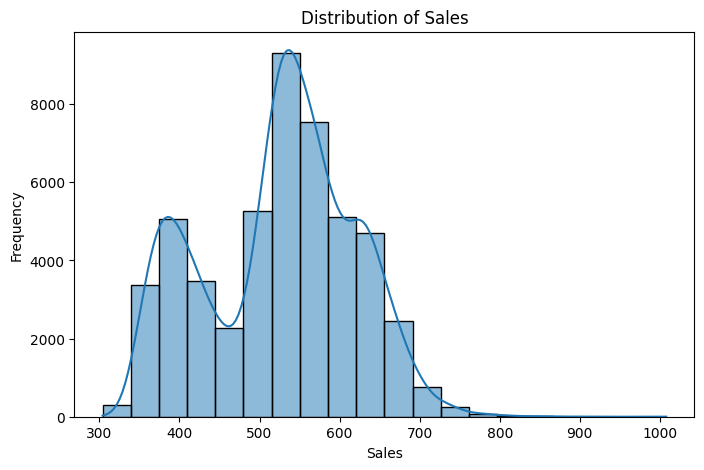

count    50000.000000
mean       524.931240
std         94.391597
min        304.000000
25%        449.000000
50%        535.000000
75%        591.000000
max       1008.000000
Name: Sales, dtype: float64

In [82]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Summary stats for Sales
df['Sales'].describe()

### 3.2 Country-Level Demand Totals (Raw)

In [ ]:
# Compute raw total demand per country by cumulating for all three processing centers
countries = ['AUS','CAN','GER','FRA','IND','JAP','USA','UK']
for code in countries:
    df[f'{code}_total_raw'] = df[[f'{code}_1', f'{code}_2', f'{code}_3']].sum(axis=1)
# Show summary stats for these totals
totals = [f'{code}_total_raw' for code in countries]
pd.DataFrame(df[totals].describe().T)

,count,mean,std,min,25%,50%,75%,max
AUS_total_raw,50000.0,5.98892,2.088273,3.0,5.0,5.0,7.0,28.0
CAN_total_raw,50000.0,14.99462,2.004882,7.0,14.0,15.0,16.0,23.0
GER_total_raw,50000.0,24.02946,7.345036,10.0,19.0,22.0,27.0,98.0
FRA_total_raw,50000.0,32.99868,14.838542,8.0,22.0,30.0,40.0,162.0
IND_total_raw,50000.0,41.99454,15.039703,25.0,31.0,37.0,48.0,212.0
JAP_total_raw,50000.0,50.99162,2.478401,41.0,49.0,51.0,53.0,63.0
USA_total_raw,50000.0,59.99120,1.278732,55.0,59.0,60.0,61.0,65.0
UK_total_raw,50000.0,68.99706,1.377349,62.0,68.0,69.0,70.0,75.0


### 3.3 Seasonal Factor Counts and Sales by Factor

In [50]:
df['factor'].unique()

array(['factor1', 'factor2', 'factor3', 'factor4', nan], dtype=object)

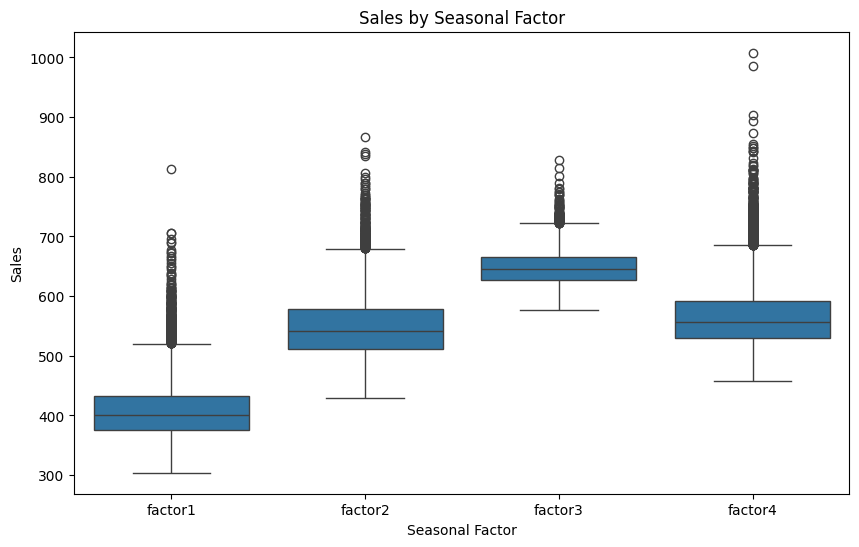

In [53]:
# Count of each factor level
df['factor'].value_counts()

# Boxplot of Sales by factor
plt.figure(figsize=(10, 6))
sns.boxplot(x='factor', y='Sales', data=df)
plt.title('Sales by Seasonal Factor')
plt.xlabel('Seasonal Factor')
plt.ylabel('Sales')
plt.show()

## 4. Visualizing Feature Distributions

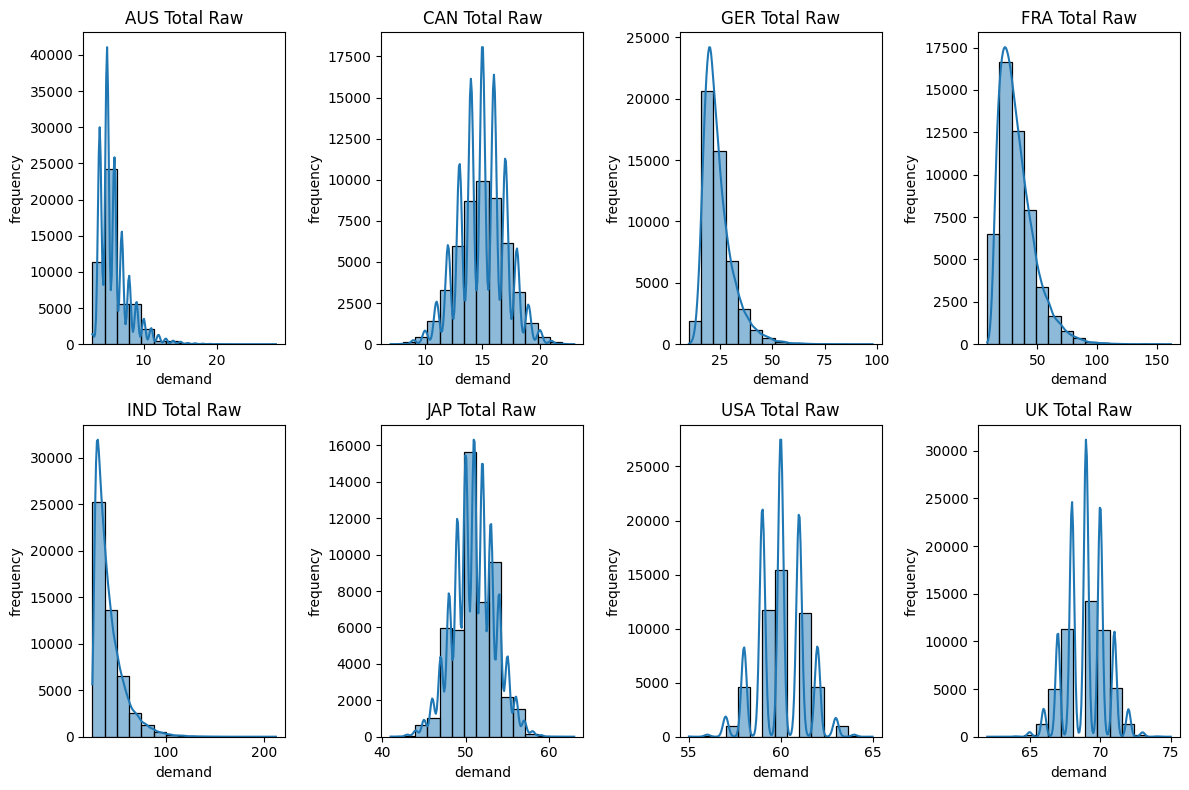

In [57]:
# Plot distributions for each country's total raw demand
plt.figure(figsize=(12, 8))
for i, code in enumerate(countries):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[f'{code}_total_raw'], bins=15, kde=True)
    plt.title(f'{code} Total Raw')
    plt.xlabel('demand')
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

### 4.1 Boxplots to Detect Outliers

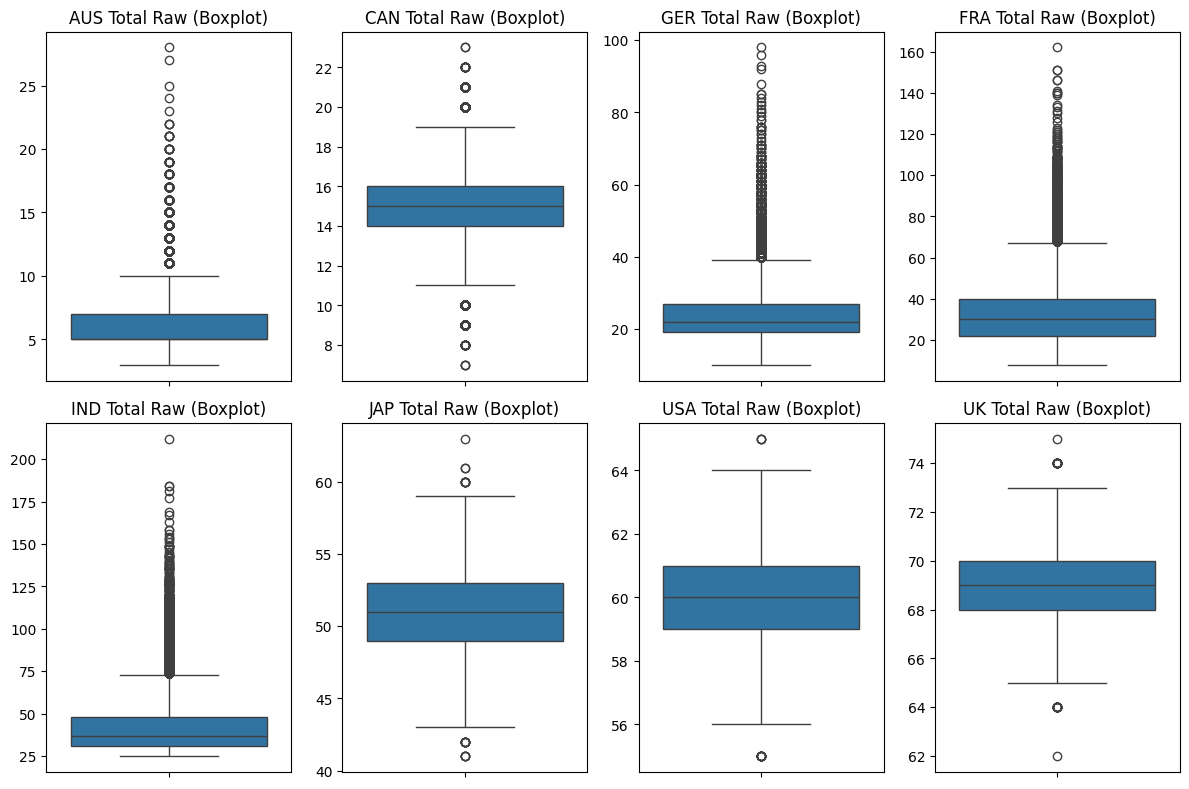

In [58]:
plt.figure(figsize=(12, 8))
for i, code in enumerate(countries):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[f'{code}_total_raw'])
    plt.title(f'{code} Total Raw (Boxplot)')
    plt.ylabel('')
plt.tight_layout()
plt.show()

## 5. Correlation Analysis (Raw Data)

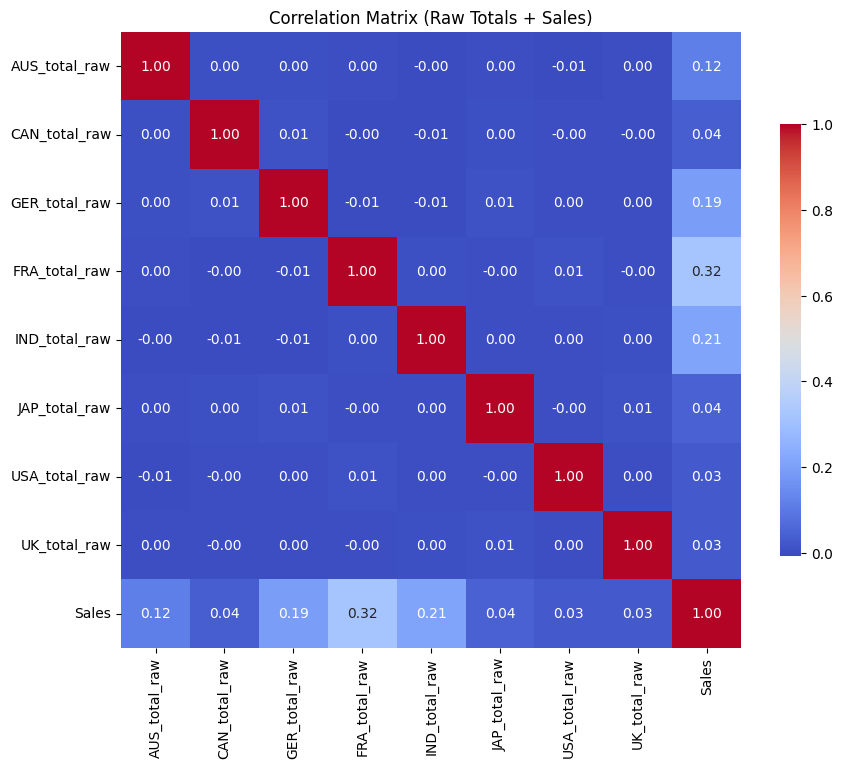

In [59]:
# Correlation heatmap among numeric columns (including raw totals and Sales)
cols_to_corr = totals + ['Sales']
corr_matrix_raw = df[cols_to_corr].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_raw, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'shrink':0.7})
plt.title('Correlation Matrix (Raw Totals + Sales)')
plt.show()

## 6. Average Sales per Factor

Text(0, 0.5, 'Average Sales')

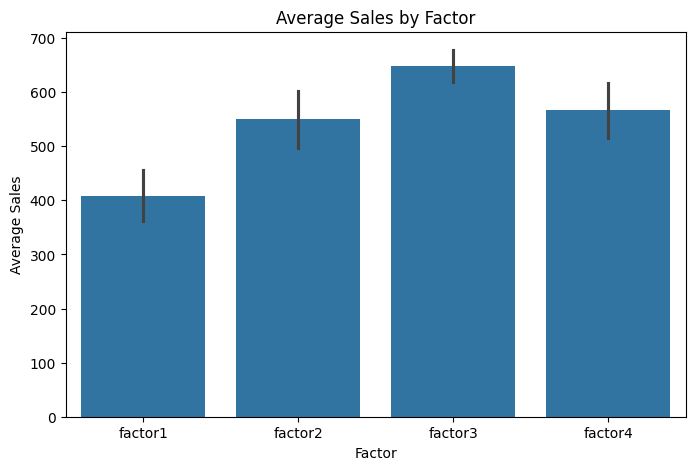

In [81]:
plt.figure(figsize=(8, 5))
sns.barplot(x='factor', y='Sales', data=df, estimator=np.mean, errorbar='sd')
plt.title('Average Sales by Factor')
plt.xlabel('Factor')
plt.ylabel('Average Sales')

## 7. Applying Scaling Factors and Re-evaluating Distributions

In [ ]:
# Build scaling map for all countries
country_code_map = { 'AUS': 'Australia', 'CAN': 'Canada', 'GER': 'Germany', 'FRA': 'France', 'IND': 'India', 'JAP': 'Japan', 'USA': 'United States of America' }
scaling_map_full = { code: scaling.loc[scaling['Country'] == country, 'Scaling Factor'].values[0] for code, country in country_code_map.items() }

# Apply scaling to original columns directly for comparison
df_scaled = df.copy()
for code, factor in scaling_map_full.items():
    for i in [1,2,3]:
        df_scaled[f'{code}_{i}'] = df_scaled[f'{code}_{i}'] * factor
# Recompute totals on scaled data
for code in countries:
    df_scaled[f'{code}_total_scaled'] = df_scaled[[f'{code}_1', f'{code}_2', f'{code}_3']].sum(axis=1)

# Show summary statistics for scaled totals
scaled_totals = [f'{code}_total_scaled' for code in countries]
pd.DataFrame(df_scaled[scaled_totals].describe().T)

,count,mean,std,min,25%,50%,75%,max
AUS_total_scaled,50000.0,20.961220,7.308956,10.50,17.50,17.50,24.50,98.00
CAN_total_scaled,50000.0,37.486550,5.012205,17.50,35.00,37.50,40.00,57.50
GER_total_scaled,50000.0,54.066285,16.526331,22.50,42.75,49.50,60.75,220.50
FRA_total_scaled,50000.0,61.047558,27.451302,14.80,40.70,55.50,74.00,299.70
IND_total_scaled,50000.0,50.393448,18.047644,30.00,37.20,44.40,57.60,254.40
JAP_total_scaled,50000.0,79.037011,3.841522,63.55,75.95,79.05,82.15,97.65
USA_total_scaled,50000.0,89.986800,1.918098,82.50,88.50,90.00,91.50,97.50
UK_total_scaled,50000.0,68.997060,1.377349,62.00,68.00,69.00,70.00,75.00


### 7.1 Comparing Raw vs. Scaled Distributions for One Country (e.g., USA)

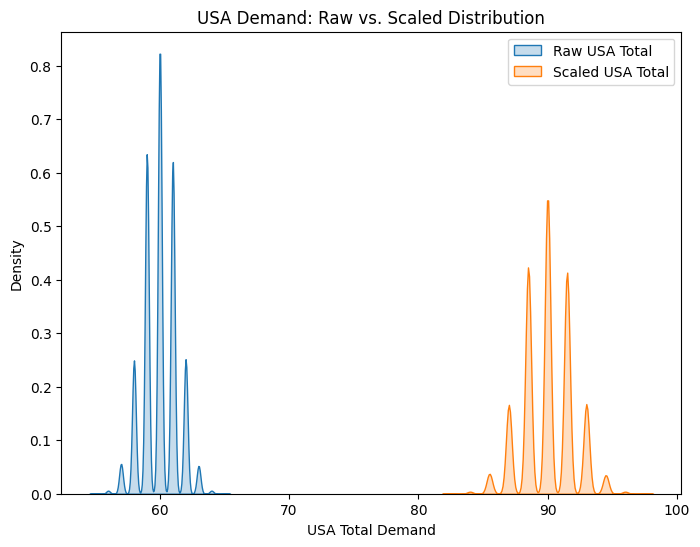

In [70]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['USA_total_raw'], label='Raw USA Total', fill=True)
sns.kdeplot(df_scaled['USA_total_scaled'], label='Scaled USA Total', fill=True)
plt.title('USA Demand: Raw vs. Scaled Distribution')
plt.xlabel('USA Total Demand')
plt.ylabel('Density')
plt.legend()
plt.show()

## 8. Correlation Analysis (Scaled Data)

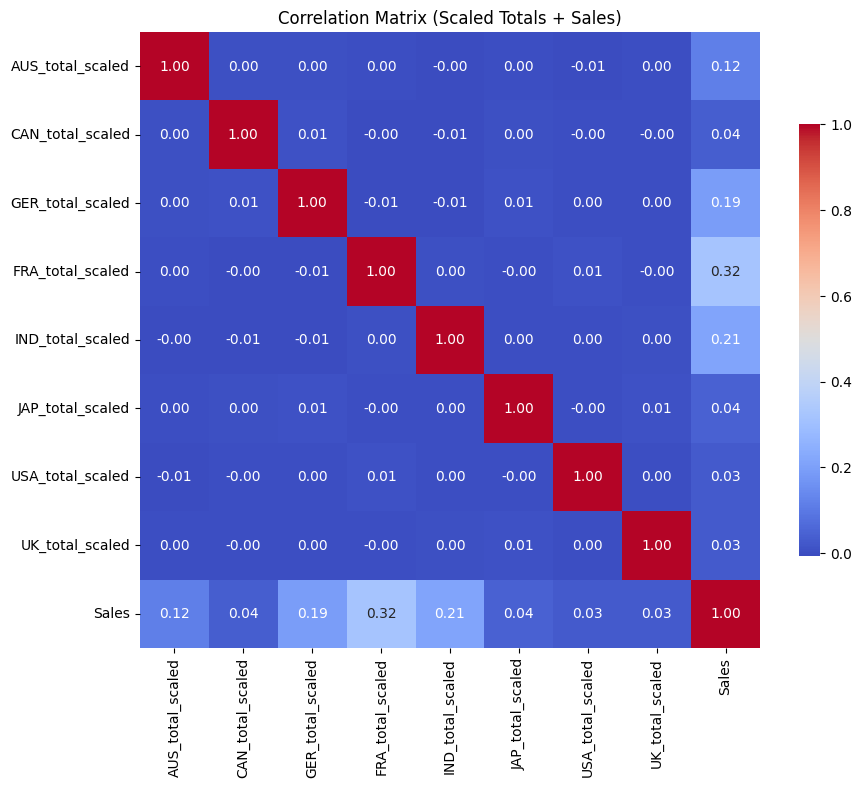

In [71]:
# Correlation among scaled totals and Sales
cols_to_corr_scaled = scaled_totals + ['Sales']
corr_matrix_scaled = df_scaled[cols_to_corr_scaled].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_scaled, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'shrink':0.7})
plt.title('Correlation Matrix (Scaled Totals + Sales)')
plt.show()

## 9. Pairwise Scatter Plots (Selected Features)

In [72]:
corr_with_sales = corr_matrix_scaled['Sales'].abs().sort_values(ascending=False)
corr_with_sales

Sales               1.000000
FRA_total_scaled    0.319031
IND_total_scaled    0.211197
GER_total_scaled    0.193338
AUS_total_scaled    0.115491
JAP_total_scaled    0.042443
CAN_total_scaled    0.035473
USA_total_scaled    0.026751
UK_total_scaled     0.025590
Name: Sales, dtype: float64

In [75]:
pair_df

,FRA_total_scaled,IND_total_scaled,GER_total_scaled,Sales
0,70.30,33.6,40.50,408
1,59.20,39.6,49.50,395
2,62.90,42.0,60.75,368
3,46.25,37.2,49.50,364
4,44.40,38.4,38.25,355
...,...,...,...,...
49995,35.15,34.8,49.50,624
49996,83.25,97.2,72.00,764
49997,44.40,33.6,54.00,636
49998,37.00,46.8,54.00,658


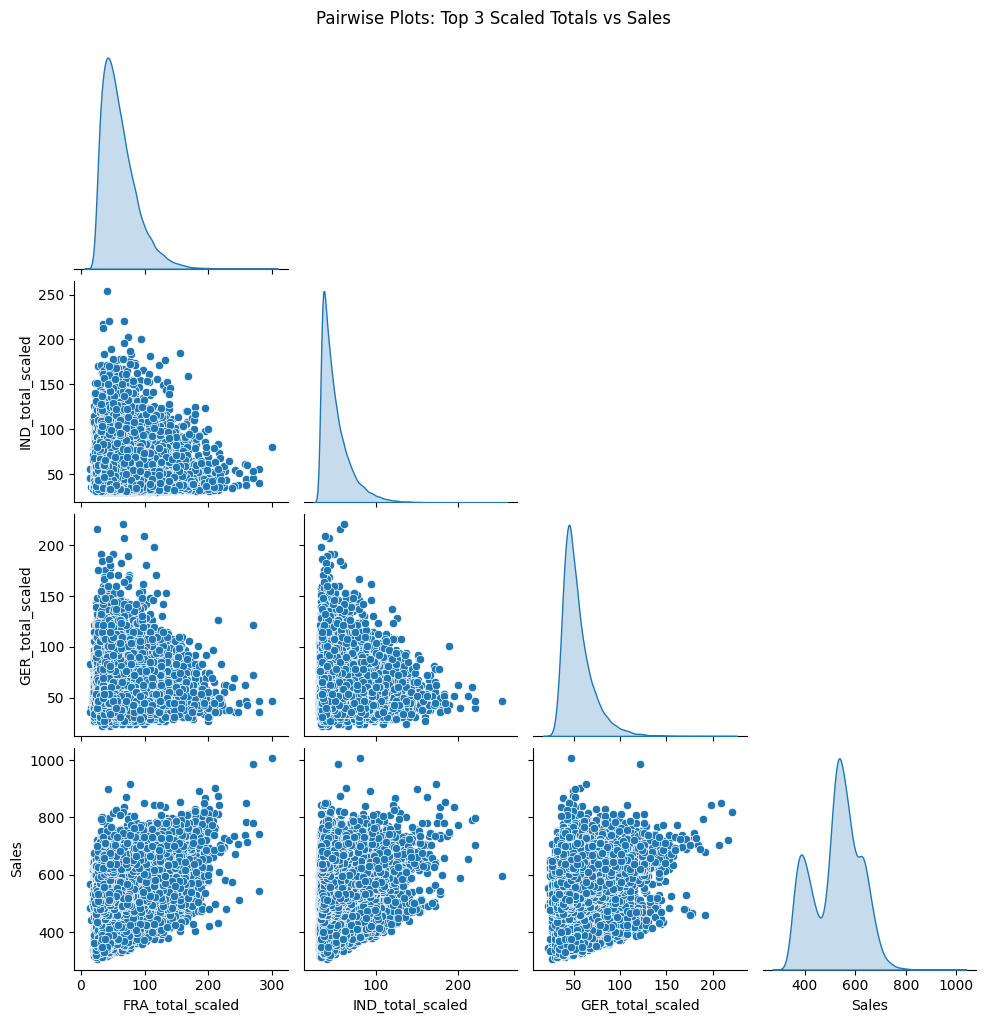

In [78]:
# Use pairplot on a reduced set: Sales and top 3 correlated country totals (scaled)
corr_with_sales = corr_matrix_scaled['Sales'].abs().sort_values(ascending=False)

# Skip 'Sales' itself, take next 3
top_features = corr_with_sales.index[1:4].tolist()
pair_df = df_scaled[top_features + ['Sales']]
sns.pairplot(pair_df, corner=True, diag_kind='kde')
plt.suptitle('Pairwise Plots: Top 3 Scaled Totals vs Sales', y=1.02)
plt.show()

## 10. Obervations and Insights
- missing values: we have 50000 rows. But 520 rows are missing values for the column `factor`, which is 1% of the data
- The most common factor is factor4 with roughly 20000 rows (out of 50000). factor3 is the least common one
- I could impute the 520 missing rows with the most common value (factor4), omit it completely (which is reasonable as it is only 1%) or introduce a new category for it
- in terms of demand, Australia has the lowest cumulated demand, whereas UK has the most
- the histogram for sales shows a skew to the right, but most of them are between 400-700. However there are outliers above 800
- the boxplots for the total raw demands show that Germany and France have a lot of outliers and are right-skewed. That means I need to perform outlier treatment (like capping or winsorizing. Maybe also rather user tree-based models which are more robust against outliers)
- saisonal effects: we can clearly tell there are seasonal effects as in periods with factor3 the average amount of sales is the highest, followed by factor2 and factor4. factor1 is the lowest
- correlation: France has the highest linear correlation with the sales (0,32), followed by India (0,21) and Germany (0,12)
- after scaling: France stays as no1 correlation with sales, then Germany (0,24), then India (0,19) due to the individual scaling factors
- there are no perfect linear correlations detected but the scatter plots show a positive trend for the top3 countries. Meaning the higher the demand is coming from France, the higher are the sales
- the scatters are growing with the demand: that means there is heteroskedasticity
- among the countries themselves, there is no real correlation detectable. That means we do not have multi-collinearity issues